In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
gold_data=pd.read_csv('/content/gld_price_data.csv')

In [4]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [15]:
#IN DATASET GLD REPRESENTS GOLD PRICE.

In [5]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
gold_data.shape

(2290, 6)

In [7]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [10]:
correlation=gold_data.corr()

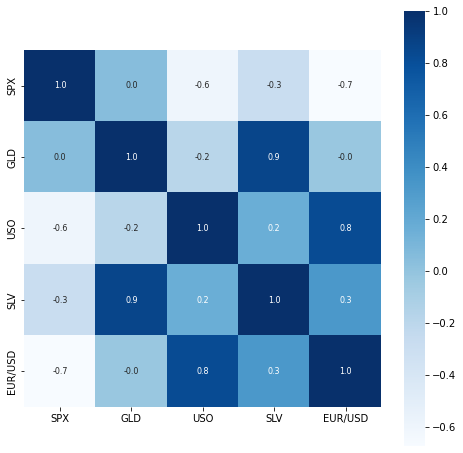

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [12]:
#seeing correlation values for GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


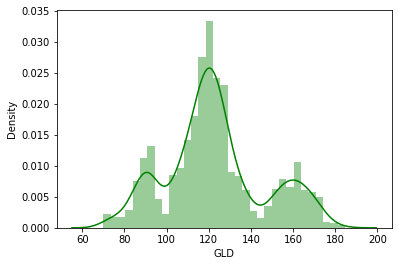

In [13]:
#CHECKING FOR DISTRIBUTION OF GLD PRICE.
sns.distplot(gold_data['GLD'],color='green')

In [14]:
#MAJORITY OF VALUES ARE IN THE RANGE OF 120.

In [16]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [17]:
#DATE COLUMN IS NOT USEFUL.

In [18]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [19]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [22]:
#MODEL TRAINING

In [23]:
#RANDOM FOREST REGRESSOR
regressor=RandomForestRegressor(n_estimators=100)
#n_estimators is given default value 100.

In [24]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [25]:
#MODEL EVALUATION
#PREDICTION ON TEST DATA.
test_data_prediction=regressor.predict(X_test)
print(test_data_prediction)

[168.54469941  81.83259997 116.34690003 127.79180056 120.62930131
 154.47079788 150.34489844 126.19950021 117.59219894 125.97800119
 116.89360057 171.69660092 141.78629855 167.99179882 115.20280001
 117.61940038 137.78600373 169.95570075 158.65850344 159.22599905
 155.19070033 125.37630031 175.44199961 156.95820393 125.30180033
  93.74199938  77.96679971 120.72090008 119.1139994  167.50780015
  88.15590046 125.50710027  90.96300047 117.71280035 121.10349928
 136.15770038 115.38150156 115.04940075 146.59549958 107.43830097
 104.28700239  87.31279802 126.59180037 118.06730007 153.25319919
 119.36380026 108.32080007 108.15039843  93.23880039 127.1049977
  74.58460062 113.62459898 121.20220008 111.31269945 118.96729875
 120.362499   159.12760034 168.49910184 146.83229658  85.78219837
  94.2141005   86.88429906  90.44719996 119.03780054 126.5336004
 127.36860031 169.93150043 122.31109973 117.37389897  98.52730049
 168.1729006  142.58699802 132.29310302 121.21770233 121.14839933
 119.7058005

In [26]:
#R SQUARED ERROR
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R SQUARED ERROR: ",error_score)

R SQUARED ERROR:  0.9891145880042163


In [27]:
#we don't have any specific range of r square which is considered good.
#we find values in data i.e. test_data_prediction is in range of 100s
#and our r^2 error is 0.98 which is meagre in comparison to the data
#values.

In [28]:
#COMPARING THE ACTUAL AND PREDICTED VALUES BY PLOT

In [29]:
Y_test=list(Y_test)

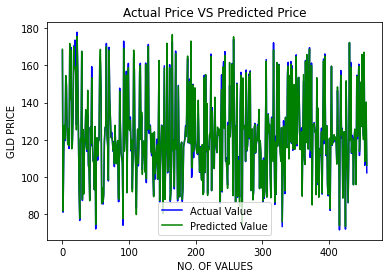

In [30]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price VS Predicted Price')
plt.xlabel('NO. OF VALUES')
plt.ylabel('GLD PRICE')
plt.legend()
plt.show()

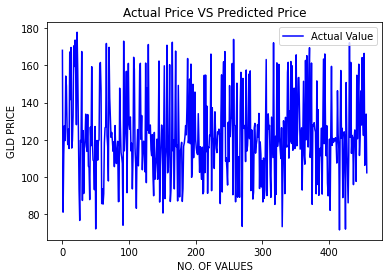

In [31]:
plt.plot(Y_test,color='blue',label='Actual Value')
#plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price VS Predicted Price')
plt.xlabel('NO. OF VALUES')
plt.ylabel('GLD PRICE')
plt.legend()
plt.show()

In [32]:
#FROM ABOVE GRAPHS WE CAN SEE THAT PREDICTED VALUES ARE VERY CLOSE TO ACTUAL 
#VALUES.

In [33]:
#SO WE SUCCESSFULLY USED RANDOMFOREST REGRESSOR MODEL TO PREDICT GOLD PRICES.